In [2]:
#%The supercell gemoetry
import math
import meep as mp

#na = 1
#r = 0.0725
#n = math.sqrt(32)
def DiamondLattice(eps,r,n,ax,ay,az,pad):
    #
    L = math.sqrt(3)/4.0
    hs = math.sqrt(3)/12.0

    geometry_lattice = mp.Lattice(size=mp.Vector3(n*ax,n*ax,n*ax))
    #v1 = mp.Vector3(1)

    #displace vector to fill the whole supercell
    v2 = mp.Vector3(0.5*ax,0.5*ay,0)
    v1 = mp.Vector3(0,ay*1.0/3.0,az*1.0/3.0)
    v5 = mp.Vector3(ax*0.5,ay*5.0/6.0,az*1.0/3.0)
    v3 = mp.Vector3(ax*0.5,ay*1.0/6.0,az*2.0/3.0)
    v4 = mp.Vector3(0,ay*2.0/3.0,az*2.0/3.0)

    m = mp.Medium(epsilon=eps)
    #center of the four supercell rod
    c1 = mp.Vector3(0,-math.sqrt(6)/12,-hs/2)
    c2 = mp.Vector3(math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c3 = mp.Vector3(-math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c4 = mp.Vector3(0,0,L/2)
    geometry = [mp.Cylinder(center=c1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v1,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v1,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v1,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v2,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v2,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v2,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v3,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v3,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v3,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v4,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v4,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v4,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v5,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v5,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v5,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v5,radius=r, material=m, height=L, axis=c4)]

    geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry, ax,ay,az)
    geometry.append(mp.Block(center=mp.Vector3(0,0, (n*ax+pad)/2.0), size=mp.Vector3(n*ax, n*ax, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(0,0,-(n*ax+pad)/2.0), size=mp.Vector3(n*ax, n*ax, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3( (n*ax+pad)/2.0,0,0), size=mp.Vector3(pad, n*ax, n*ax),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(-(n*ax+pad)/2.0,0,0), size=mp.Vector3(pad, n*ax, n*ax),material=mp.air))
    
    geometry.append(mp.Block(center=mp.Vector3( (n*ax+pad)/2.0,0, (n*ax+pad)/2.0), size=mp.Vector3(pad, n*ax, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(-(n*ax+pad)/2.0,0, (n*ax+pad)/2.0), size=mp.Vector3(pad, n*ax, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3( (n*ax+pad)/2.0,0,-(n*ax+pad)/2.0), size=mp.Vector3(pad, n*ax, pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(-(n*ax+pad)/2.0,0,-(n*ax+pad)/2.0), size=mp.Vector3(pad, n*ax, pad),material=mp.air))
    
    geometry.append(mp.Block(center=mp.Vector3(0, (n*ax+pad)/2.0,0), size=mp.Vector3(n*ax+2*pad, pad, n*ax+2*pad),material=mp.air))
    geometry.append(mp.Block(center=mp.Vector3(0,-(n*ax+pad)/2.0,0), size=mp.Vector3(n*ax+2*pad, pad, n*ax+2*pad),material=mp.air))
    #geometry.append(mp.Cylinder(center=c4,radius=r, material=mp.air, height=L, axis=c4))
    return geometry, geometry_lattice

In [9]:
#supercell size
n = 6
r = 0.0725 #rod radius
eps = 32 #material epsilon
#lattice vectors
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
#get the geometry and cell
pad = 1.0
geometry,geometry_lattice=DiamondLattice(eps,r,n,ax,ay,az,2*pad)
dpml = 1.0

cell = mp.Vector3(n*ax+2*(dpml+pad),n*ax+2*(dpml+pad),n*ax+2*(dpml+pad))

resolution = 20
pml_layers = [mp.PML(dpml)]
pos = mp.Vector3(0,0,az/8.0)

fcen = 0.5
df = 0.8
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=pos)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry, eps_averaging=False,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)

#h = mp.Harminv(mp.Ez, pos, fcen, df)
#sim.run(mp.after_sources(h), until_after_sources=100)

#m = h.modes[0]
#f = m.freq
#Q = m.Q
sim.run(mp.dft_ldos(fcen, df, 100), until_after_sources=1)
#sim.run(until=100)
mp.output_epsilon(sim)
#mp.output_hpwr(sim)

-----------
Initializing structure...
Meep progress: 0.025/13.5 = 0.2% done in 6.4s, 3426.5s to go
Meep progress: 0.95/13.5 = 7.0% done in 10.5s, 138.3s to go
Meep progress: 1.875/13.5 = 13.9% done in 14.5s, 90.1s to go
Meep progress: 2.8/13.5 = 20.7% done in 18.6s, 71.0s to go
Meep progress: 3.7/13.5 = 27.4% done in 22.6s, 59.8s to go
Meep progress: 4.625/13.5 = 34.3% done in 26.7s, 51.2s to go
Meep progress: 5.55/13.5 = 41.1% done in 30.7s, 44.0s to go
Meep progress: 6.475/13.5 = 48.0% done in 34.8s, 37.7s to go
Meep progress: 7.4/13.5 = 54.8% done in 38.8s, 32.0s to go
Meep progress: 8.325/13.5 = 61.7% done in 42.9s, 26.7s to go
Meep progress: 9.25/13.5 = 68.5% done in 46.9s, 21.6s to go
Meep progress: 10.175/13.5 = 75.4% done in 51.0s, 16.7s to go
Meep progress: 11.1/13.5 = 82.2% done in 55.0s, 11.9s to go
Meep progress: 12.025/13.5 = 89.1% done in 59.1s, 7.3s to go
Meep progress: 12.95/13.5 = 95.9% done in 63.2s, 2.7s to go
ldos0:, 0.1, 6.90372057009
ldos0:, 0.108080808081, -12.56

Text(0,0.5,'LDOS')

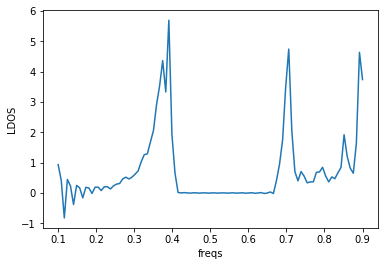

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
freqs = np.linspace(0.1,0.9,100)
plt.plot(freqs,sim.ldos_data)
plt.xlabel("freqs")
plt.ylabel("LDOS")

In [8]:
mp.output_epsilon(sim)